In [11]:
#Import necessary libs
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns #For heatmap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

from preprocessing.preprocess_data import DataSet
import catboost as cb
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [ ]:
# selected_features = ['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
#        'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
#        'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
#        'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
#        'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
#        'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
#        'fresh_snow_6h:cm', 'is_in_shadow:idx',
#        'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
#        'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
#        'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
#        'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
#        'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
#        'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
#        'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
#        'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms']

# selected_features = ['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
#        'clear_sky_energy_1h:J', 'clear_sky_rad:W',
#        'dew_point_2m:K',
#        'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
#        'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
#        'is_in_shadow:idx',
#        'msl_pressure:hPa', 'precip_5min:mm',
#        'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
#        'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
#        'snow_depth:cm', 'snow_drift:idx',
#        'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
#        'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
#        'total_cloud_cover:p', 'visibility:m', 
#        'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms']

selected_features = ['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
       'total_cloud_cover:p', 'visibility:m', 
       'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms']


made_features = ['location', 'is_in_shadow:idx']

drop_feature = 'diffuse_rad:W'


In [12]:
data_collection = DataSet()

<Axes: title={'center': 'X test c'}>

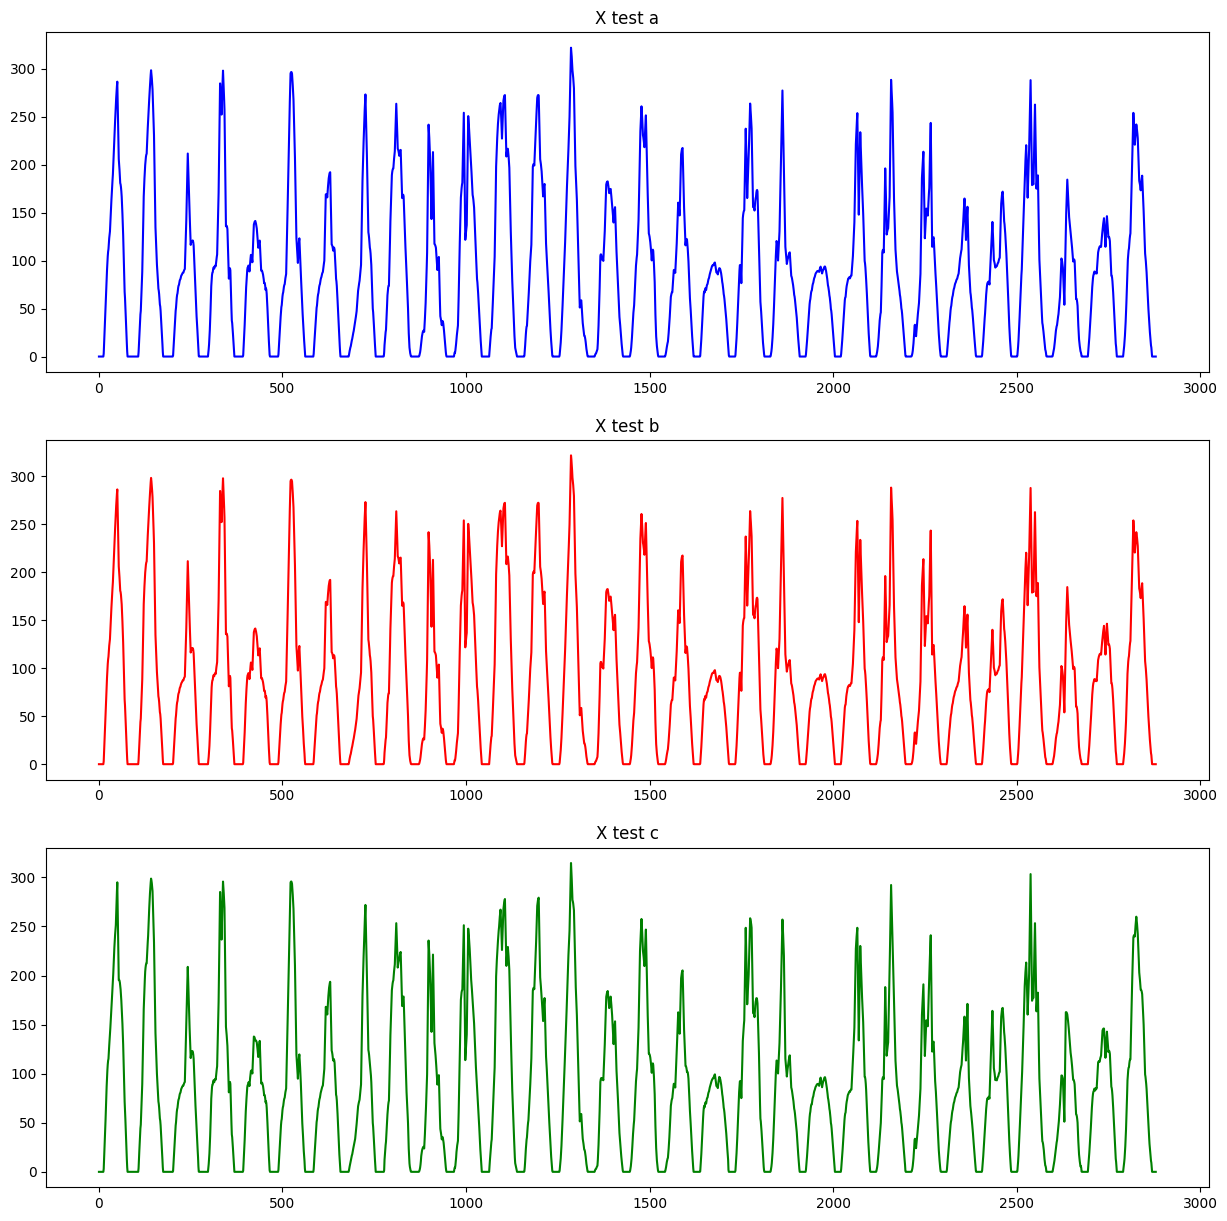

In [14]:
feature_name = 'diffuse_rad:W'
fig, axs = plt.subplots(3,1,figsize = (15,15))
data_collection.X_test_estimated['a'][feature_name].plot(ax=axs[0], title='X test a', color='blue')
data_collection.X_test_estimated['b'][feature_name].plot(ax=axs[1], title='X test b', color='red')
data_collection.X_test_estimated['c'][feature_name].plot(ax=axs[2], title='X test c', color='green')